In [1]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sst = scp.load_sst()["sst"].loc[:, -20:30, 150:275]
ssta = scp.get_anom(sst)

In [3]:
eof = scp.EOF(ssta)
eof.solve()

In [4]:
pc = -eof.get_pc(npt=2)
pt = -eof.get_pt(npt=2)

<Figure size 640x480 with 0 Axes>

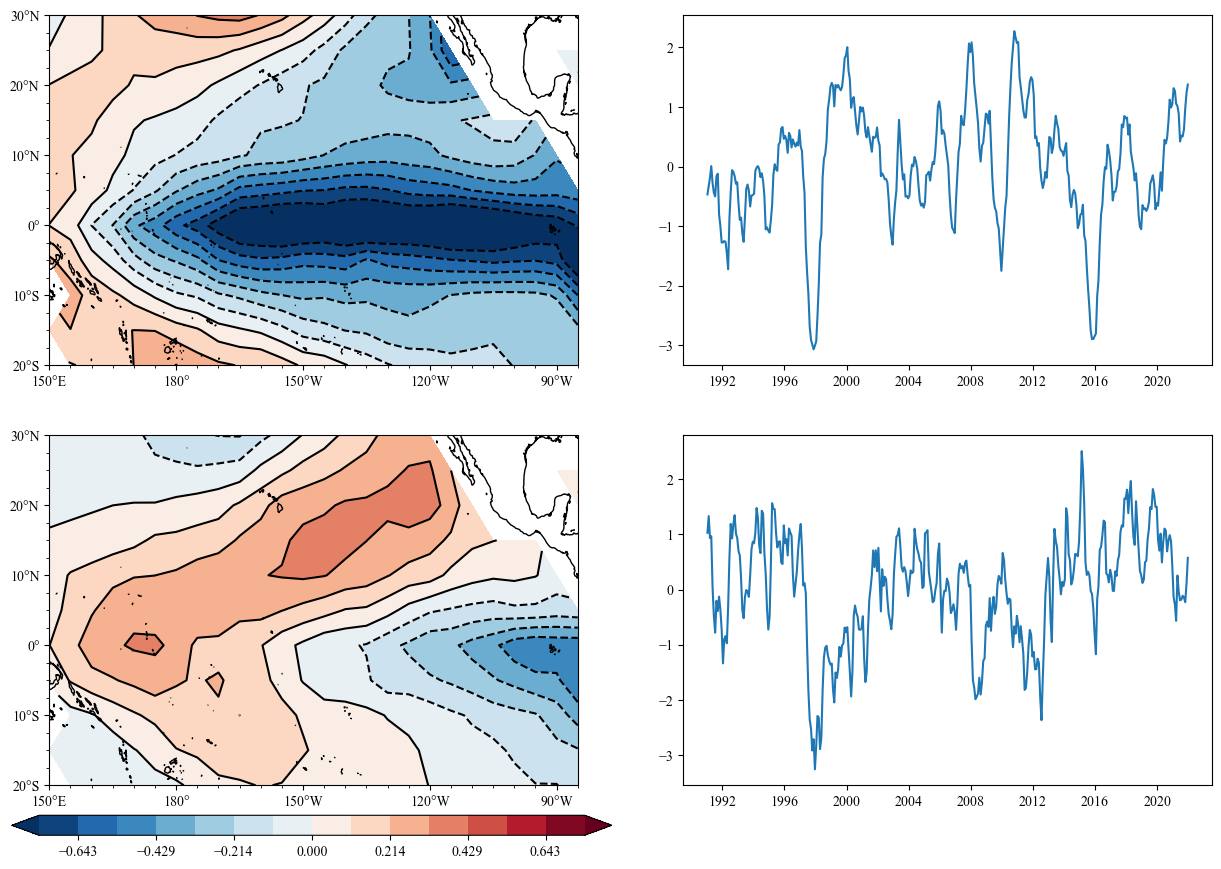

In [5]:
import cartopy.crs as ccrs
import sacpy.Map
lon , lat = np.array(ssta.lon) , np.array(ssta.lat)
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
m1 = ax.scontourf(lon,lat,pt[0,:,:],cmap='RdBu_r',levels=np.linspace(-0.75,0.75,15),extend="both")
ax.scontour(m1,colors="black")
ax.init_map(smally=2.5)
# plt.colorbar(m1)
ax2 = fig.add_subplot(222)
ax2.plot(sst.time,pc[0])
ax3 = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
m2 = ax3.scontourf(lon,lat,pt[1,:,:],cmap='RdBu_r',levels=np.linspace(-0.75,0.75,15),extend="both")
ax3.scontour(m2,colors="black")
ax3.init_map(smally=2.5)
ax4 = fig.add_subplot(224)
ax4.plot(sst.time,pc[1])
cb_ax = fig.add_axes([0.1,0.06,0.4,0.02])
fig.colorbar(m1,cax=cb_ax,orientation="horizontal")
plt.savefig("../pic/eof_ana.png",dpi=300)